In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 유동인구월별총합 막대

In [5]:
#유동인구월별총합 그래프
ty = #유동인구 값 데이터 안심구역에서 받아옴

In [6]:
people =pd.DataFrame(ty,columns = ['월','유동인구월별총합'])

In [7]:
people

,월,유동인구월별총합
0,1월,2887982
1,2월,3092910
2,3월,3185323
3,4월,3026096
4,5월,3201526
5,6월,3168864
6,7월,3270906
7,8월,3575853
8,9월,3342537
9,10월,3282819


In [8]:
people['유동인구월별총합'] = people['유동인구월별총합'].astype(int)

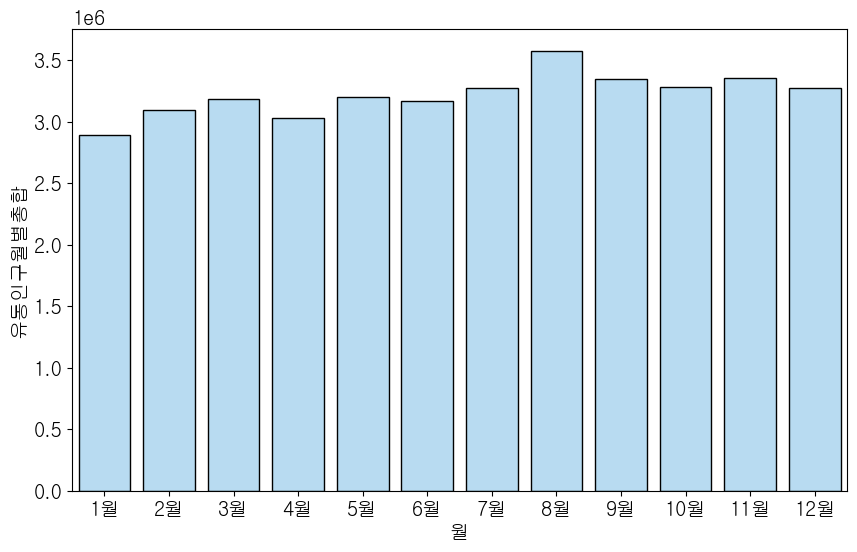

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data = people, x= people['월'],y = people['유동인구월별총합'], edgecolor = 'black', color='#AFDDFA')
# plt.savefig('유동인구월별총합.png')
plt.show();

# 2. 행정동의 유동인구수 대비 수용인원비율별 수치 그래프

In [26]:
popo = pd.read_csv('포항 유동인구수 대비 수용인원비율.csv')

In [27]:
popo.head()

,구,행정동명,유동인구수,수용인원수합,유동인구수 대비 수용인원비율
0,북구,신광면,1660.226,5765,347.241882
1,남구,장기면,4053.387,13958,344.353993
2,북구,환여동,5821.419,15780,271.067930
3,북구,기북면,648.323,1338,206.378611
4,북구,죽장면,2421.097,4068,168.023008


In [28]:
s = [100]

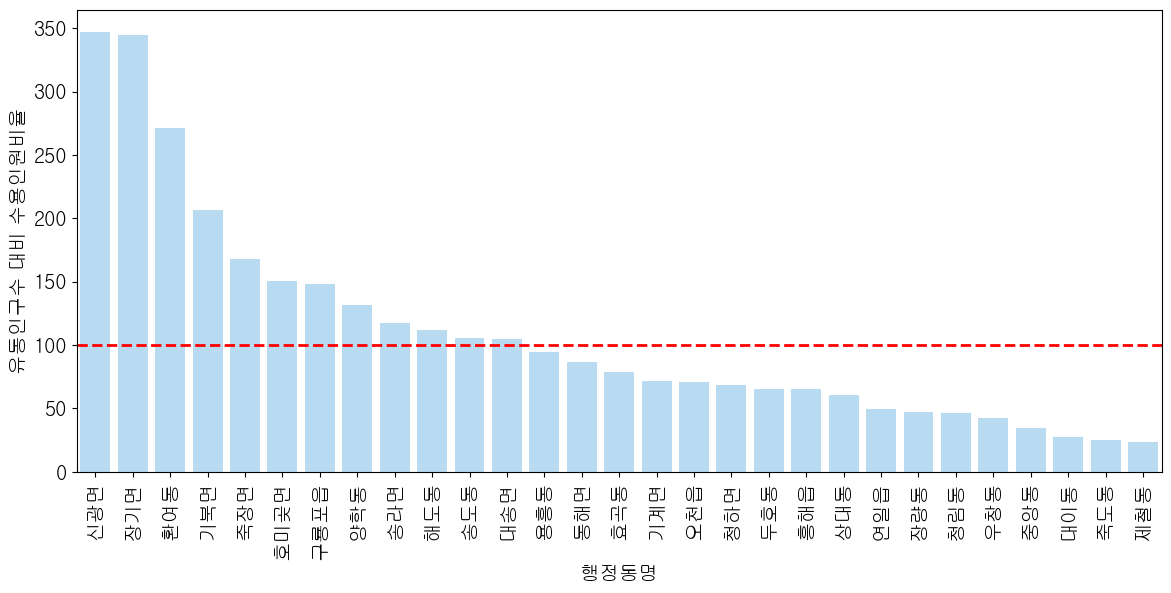

In [34]:
plt.figure(figsize=(14,6))
sns.barplot(data = popo, x = popo['행정동명'],y = popo['유동인구수 대비 수용인원비율'], color='#AFDDFA')
plt.xticks(rotation=90)
plt.axhline(y=100, color='r',linestyle='--', linewidth=2)
# plt.savefig('유동인구수 대비 수용인원비율.png')

# 3. 지진옥외랑 지진해일대피소 지도(포항근처)

In [35]:
df1 = pd.read_csv('./지진옥외대피소.csv',encoding = 'euckr')
df2 = pd.read_csv('./지진해일대피소.csv',encoding = 'euckr')

In [36]:
df1.loc[df1['위도']=='35.15.02','위도'] = '35.1502'
df1.loc[df1['경도'] =='128.37.08','경도'] = '128.3708'
df1.loc[df1['위도']=='35.15.14','위도'] = '35.1514'
df1.loc[df1['경도']=='128.36.28','경도'] = '128.3628'
df1.loc[df1['경도']=='35.481726, 126.481198','경도'] = '126.481198'

In [37]:
df1 = df1[df1['상세주소'].str.contains('포항')]

In [38]:
df2 = df2[df2['주소'].str.contains('포항')]

In [39]:
df1['정도'] = 100

In [40]:
df2['정도'] = 100

In [41]:
import folium
from folium import plugins
import json
map2 = folium.Map(location=[35.99018,129.30464])
map3 = folium.Map(location=[35.99018,129.30464])
# 004c00
rfile = open('./gogogo.geojson.txt', 'r', encoding='utf-8').read()
jsonData = json.loads(rfile)
folium.GeoJson(jsonData, name='json_data',smooth_factor = 2,style_function = lambda x: {"color": "#000000", "opacity": "5"},overlay=True).add_to(map2)
folium.GeoJson(jsonData, name='json_data',smooth_factor = 2,style_function = lambda x: {"color": "#000000", "opacity": "5"},overlay=True).add_to(map3)
#지진 해일 대피소
map3.add_child(plugins.HeatMap(zip(df2['위도'],df2['경도'], df2['정도']), radius=18))
#지진 옥외 대피소
map2.add_child(plugins.HeatMap(zip(df1['위도'],df1['경도'], df1['정도']), radius=18))

In [42]:
map3

# 4. 대피소 선정 종합본.(지도)

In [21]:
import pandas as pd
import requests
import folium
from folium.plugins import MiniMap
import json
import numpy as np
from folium import plugins
import matplotlib as mpl
import matplotlib.pyplot as plt
import reverse

In [22]:
tot = pd.read_csv('지진대피소 후보지v2. 31곳 (2).csv', encoding = 'euckr')

In [23]:
tot = tot.drop(index =25)

In [24]:
tot = tot.drop(index =12)

In [25]:
tot= tot.reset_index(drop='index')

In [26]:
tot.loc[15,'지번주소'] = '경북 포항시 북구 창흥로12번길 3'
tot.loc[7,'도로명 주소'] = '경북 포항시 북구 삼흥로57번길 11'
tot.loc[7,'지번주소'] = '경상북도 포항시 북구 장성동 866'
tot.loc[9,'지번주소'] = '경북 포항시 북구 양덕남로 69'
tot.loc[11,'지번주소'] = '경북 포항시 남구 청림서길 77'
tot.loc[23,'지번주소'] = '경상북도 포항시 북구 죽도동 74-1'
tot.loc[24,'지번주소'] = '경북 포항시 남구 호동 65'
tot.loc[28,'지번주소'] = '경상북도 포항시 북구 덕산동 113-11'
tot.loc[20,'지번주소'] = '대이로127번길 12-10'
tot.loc[29,'지번주소'] = '경북 포항시 북구 서동로 68'
tot.loc[14,'도로명 주소'] = '경상북도 포항시 북구 창포동 632'

In [27]:
# 51보다 낮은 행정동
lis =['제철동', '죽도동', '대이동', '중앙동', '우창동', '청림동', '장량동', '연일읍']

In [28]:
pohang = pd.read_csv('포항시 대피소 현황.csv')

In [29]:
pohang

,시도명,시군구명,시설명,상세주소,경도,위도,수용가능인원수
0,경상북도,포항시,양학중학교 운동장,경상북도 포항시 북구 득량동 205-6,129.342419,36.032992,2805
1,경상북도,포항시,양학생활체육운동장,경상북도 포항시 북구 득량동 219-0,129.340831,36.036154,5362
2,경상북도,포항시,양학초등학교 운동장,경상북도 포항시 북구 학잠동 191,129.344584,36.031967,4125
3,경상북도,포항시,선린요양병원 주차장,경상북도 포항시 북구 대신동 74-1,129.367309,36.046569,2888
4,경상북도,포항시,(구)포항중앙초등학교 운동장,경상북도 포항시 북구 동빈1가 90-0,129.368515,36.043652,4372
...,...,...,...,...,...,...,...
492,경상북도,포항시북구,환호 여중 앞,경상북도 포항시 북구 환호동 69,129.400759,36.071086,370
493,경상북도,포항시북구,화진1리 버스정류장 옆,경상북도 포항시 북구 송라면 화진리 261-1,129.382398,36.236579,210
494,경상북도,포항시북구,화진2리 화진비치펜션 앞,경상북도 포항시 북구 송라면 화진리 180-1,129.381916,36.239312,208
495,경상북도,포항시북구,포항해양과학고 앞,경상북도 포항시 북구 환호동 2-8,129.406166,36.074059,200


In [30]:
gu = pd.DataFrame([],columns=['시설명','상세주소','경도','위도'])

In [31]:
data = []
for s in lis:
    temp = []
    path = f'./포항시/{s}대피소.csv'
    df1 = pd.read_csv(path,encoding = 'euckr')
    df1 = df1[['시설명','상세주소','경도','위도']]
    gu = pd.concat([df1,gu],axis = 0)

In [32]:
#51퍼보다 낮은 원래의 대피소
gu

,시설명,상세주소,경도,위도
0,연일근린공원,경상북도 포항시 남구 연일읍 동문리 9-2,129.351878,35.996541
1,유강중학교 운동장,경상북도 포항시 남구 연일읍 유강리 143-5,129.317924,36.008571
2,유강초등학교 운동장,경상북도 포항시 남구 연일읍 유강리 582-0,129.314572,36.003817
3,유강1리 마을회관 주변,경상북도 포항시 남구 연일읍 유강리 339-1,129.305964,36.002392
4,자명2리 마을회관 주변,경상북도 포항시 남구 연일읍 자명리 709-1,129.304096,36.01148
...,...,...,...,...
4,죽도2어린이공원,경상북도 포항시 북구 죽도동 195-6,129.359761,36.029483
5,영흥초등학교 운동장,경상북도 포항시 북구 죽도동 26-2,129.368179,36.031068
6,포항항도중학교 운동장,경상북도 포항시 북구 죽도동 655-9,129.355862,36.018698
0,인덕초등학교 운동장,경상북도 포항시 남구 인덕동 49-0,129.402135,35.984336


In [33]:
# tot-> 새로 생성 대피소
# gu  -> 기존 대피소
map2 = folium.Map(location=[35.99018,129.30464],zoom_start=12)
rfile = open('./gogo진짜 최종.geojson.txt', 'r', encoding='utf-8').read()
jsonData = json.loads(rfile)
folium.GeoJson(jsonData, name='json_data',smooth_factor = 2,style_function = lambda x: {"color": "#000000", "opacity": "5"},overlay=True).add_to(map2)
for i in range(len(tot)):
    try:
        place = tot.loc[i,'시설명']
        plac = tot.loc[i,'도로명주소']
        df = reverse.keywords(plac)
        df.reset_index()
        a,b = reverse.make_map(df)
        marker = folium.Circle([a,b], radius=50, color='#FF0000',fill=True).add_to(map2)
    except:
        place = tot.loc[i,'시설명']
        plac = tot.loc[i,'지번주소']
        df = reverse.keywords(plac)
        df.reset_index()
        a,b = reverse.make_map(df)
        marker = folium.Circle([a,b], radius=50, color='#FF0000',fill=True).add_to(map2)
        
for i,j in zip(gu['경도'],gu['위도']):
    lat = j
    lon = i
    marker = folium.Circle([lat,lon], radius=50, color="#0067a3",fill=True).add_to(map2)

In [34]:
map2

# 5. 최종 비율 올라갔는지 확인

In [146]:
popo2 = pd.read_csv('./포항대피소최종본.csv',encoding='euckr')

In [147]:
# 비율이 51지역만 확인 작업.
popo3 = popo2[popo2['유동인구수 대비 수용인원비율'] < 51]

In [148]:
popo4 = popo3[['구','행정동명','유동인구수 대비 수용인원비율','유동인구수 대비 수용인원비율2']]

In [149]:
so = popo4.iloc[0]

In [151]:
popo5 = popo4.copy()

In [152]:
popo5 = pd.concat([popo4,popo5],ignore_index=True).sort_values('행정동명')

In [153]:
popo5 = popo5.reset_index(drop='index')

In [154]:
for i in range(len(popo5)):
    if i%2 ==0:
        popo5.loc[i,'구분점'] = 1
    else:
        popo5.loc[i,'구분점']=2

In [156]:
for i in range(len(popo5)):    
    if popo5.iloc[i]['구분점'] == 1:
        popo5.loc[i,'최종 수용인원비율'] = popo5.iloc[i]['유동인구수 대비 수용인원비율']
    else:
        popo5.loc[i,'최종 수용인원비율'] = popo5.iloc[i]['유동인구수 대비 수용인원비율2']

In [158]:
popo5['구분점'] = popo5['구분점'].map({1:'전',2:'후'})

In [162]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Gulim'
plt.rcParams["font.size"] = 14

<Figure size 2160x2160 with 0 Axes>

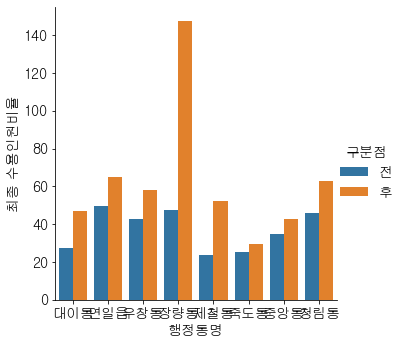

In [167]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.catplot(data = popo5, kind = 'bar',x = '행정동명',y='최종 수용인원비율',hue = '구분점')
# plt.savefig('진짜진짜최종본.png')
plt.show();